# Create plots showing the meter readings for seasonal, monthly, daily, and hourly measurements

In [1]:
import pandas as pd


# Read in the data from the CSV file
data = pd.read_excel('cons_data_all_res.xlsx')




In [2]:
# Drop duplicates
data.drop_duplicates(inplace=True)
# Remove missing or erroneous data points
data.dropna(inplace=True)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seasonal

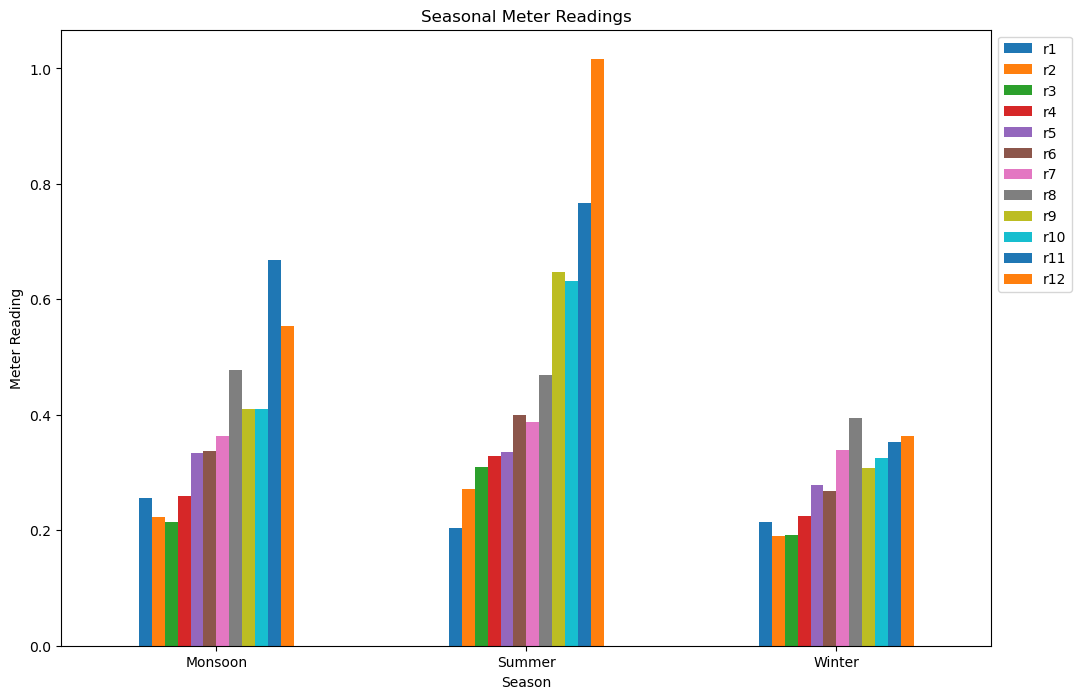

In [4]:
# Group the data by season and calculate the mean meter readings for each season
seasonal_data = data.groupby('season')[['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12']].mean()

# Create a bar plot for seasonal meter readings
seasonal_data.plot(kind='bar', figsize=(12, 8))
plt.title('Seasonal Meter Readings')
plt.xlabel('Season')
plt.ylabel('Meter Reading')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


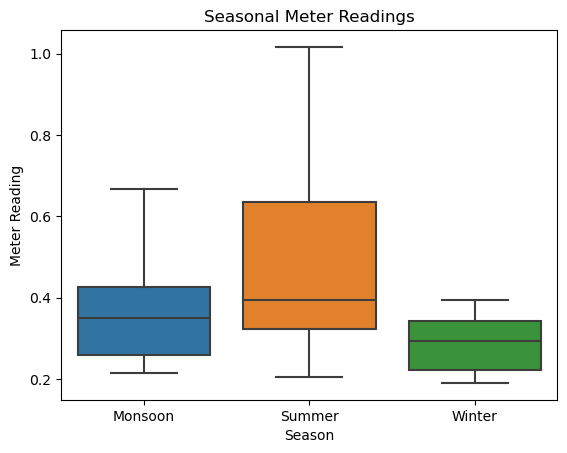

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by season and create a DataFrame with the meter readings
seasonal_data = data.groupby('season')[['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12']].mean()
seasonal_data = seasonal_data.reset_index().melt(id_vars=['season'], value_vars=['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12'])

# Create a box plot of the meter readings by season
sns.boxplot(x='season', y='value', data=seasonal_data)
plt.title('Seasonal Meter Readings')
plt.xlabel('Season')
plt.ylabel('Meter Reading')
plt.show()


# Monthly

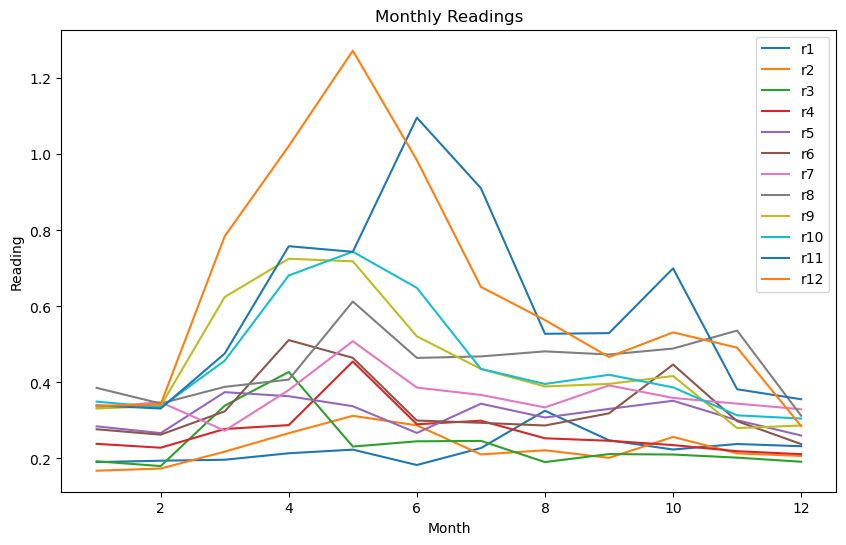

In [6]:


# Create a new DataFrame with monthly data
monthly_data = data.groupby(['moy_date']).mean().reset_index()

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create line plots for each reading
for i in range(1, 13):
    reading_col = 'r{}'.format(i)
    sns.lineplot(data=monthly_data, x='moy_date', y=reading_col, ax=ax, label=reading_col)

# Set axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Reading')
ax.set_title('Monthly Readings')

# Add legend
ax.legend()
plt.show()


# Daily

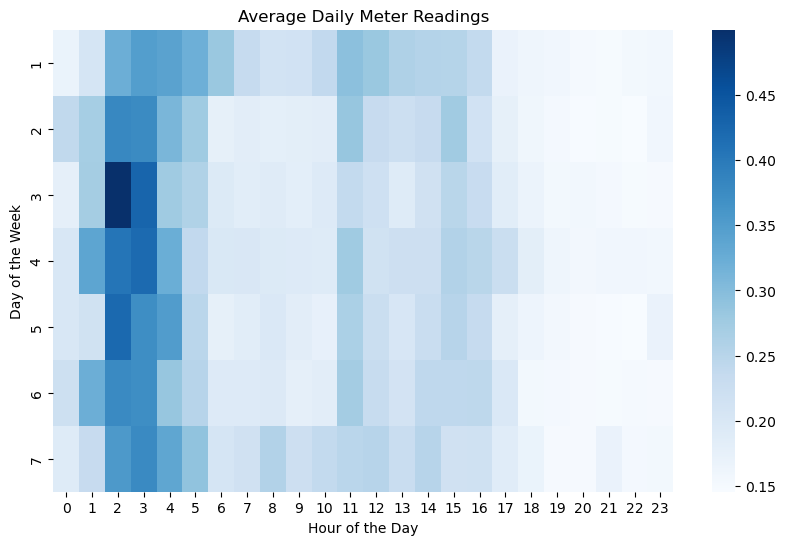

In [7]:


# Reshape the data into a matrix with days of the week as rows and hours of the day as columns
daily_data = data.pivot_table(index='dow_date', columns='hour', values='r1', aggfunc='mean')

# Plot the daily meter readings as a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(daily_data, cmap='Blues', ax=ax)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Day of the Week')
ax.set_title('Average Daily Meter Readings')
plt.show()


# Hourly

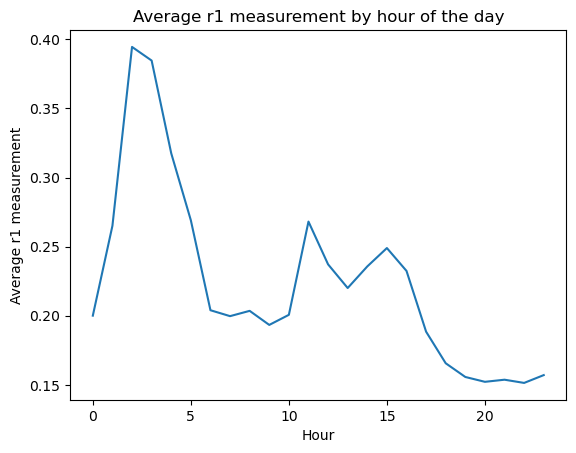

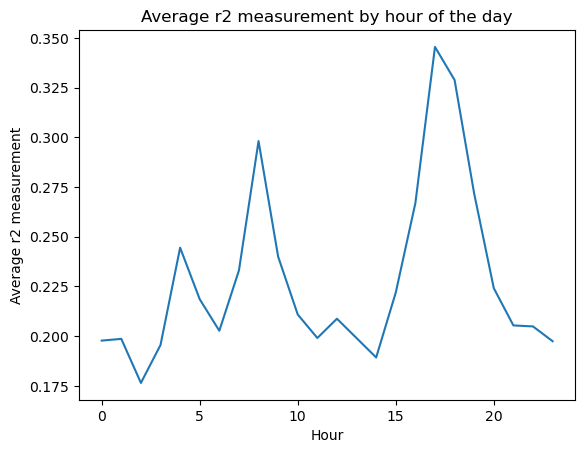

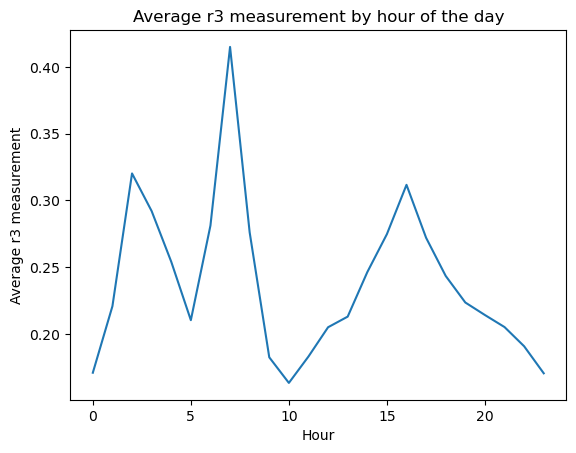

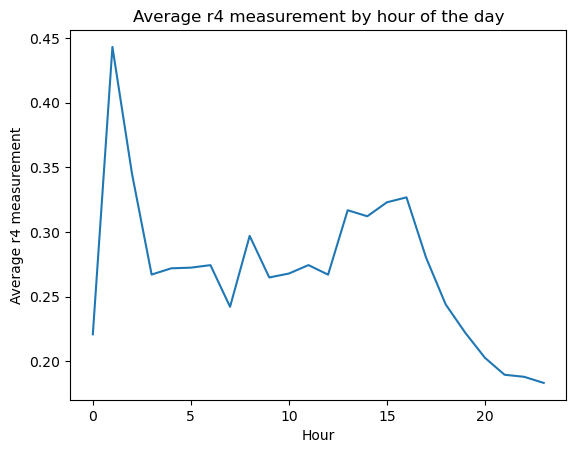

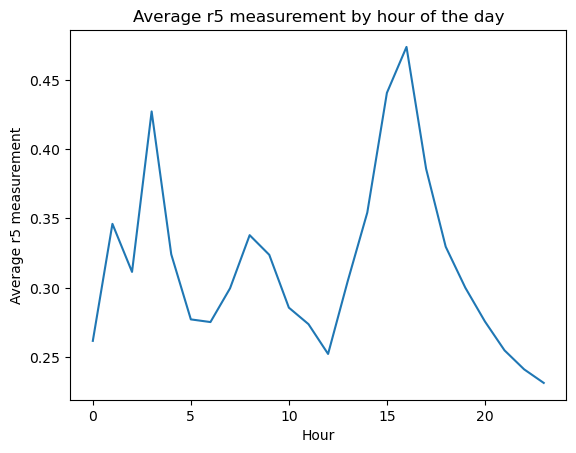

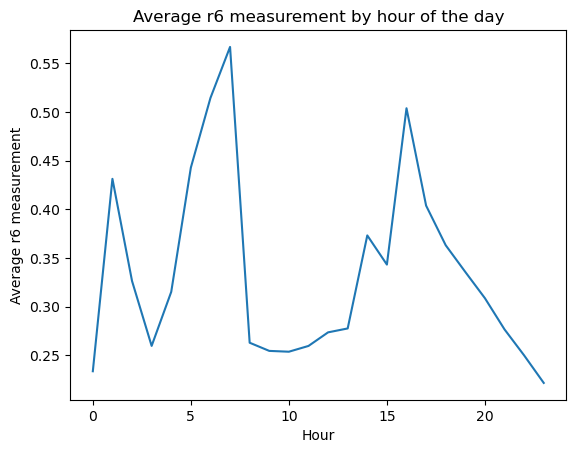

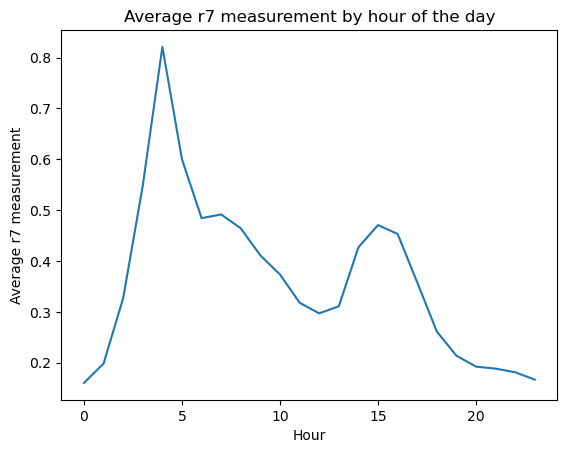

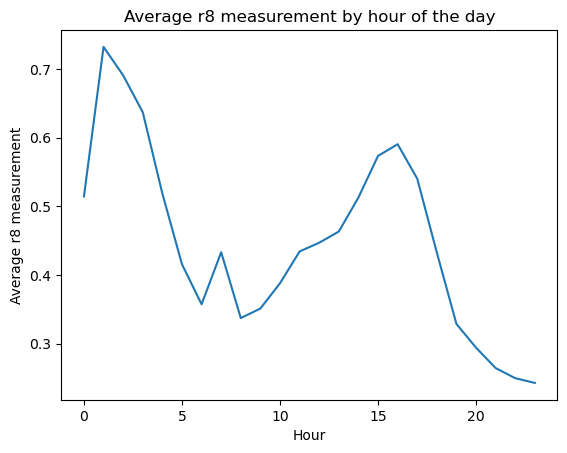

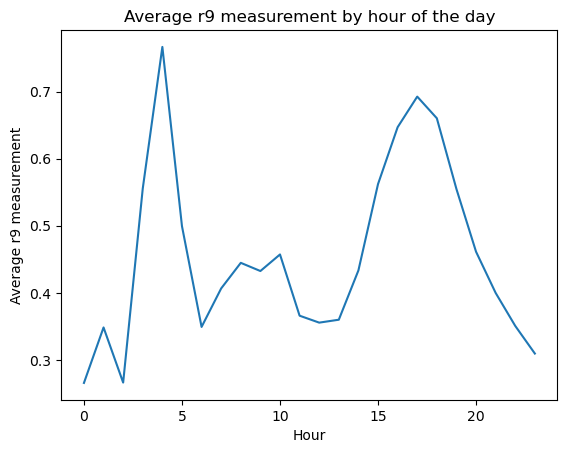

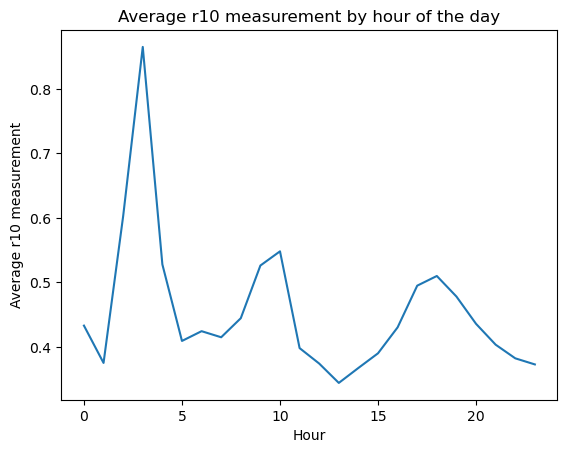

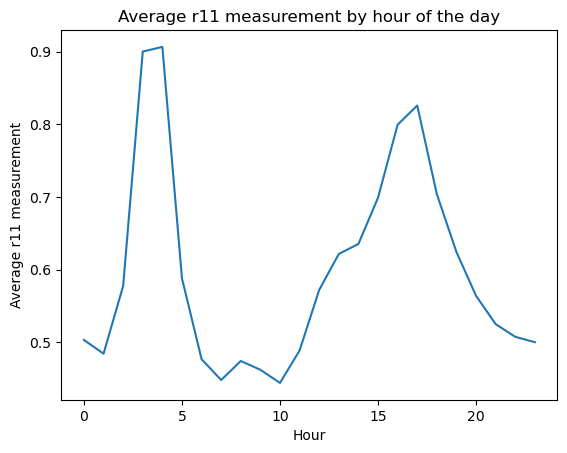

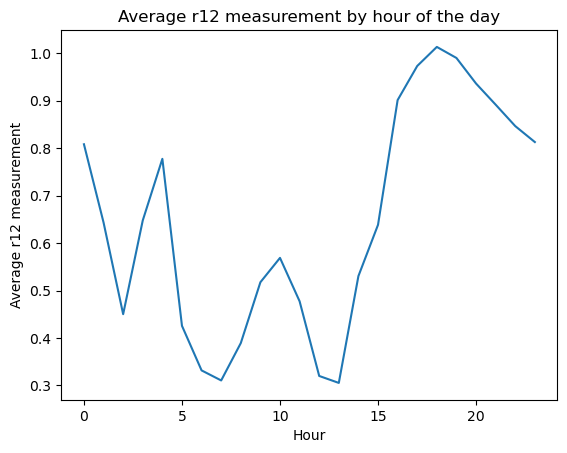

In [8]:


# Create a new DataFrame with hourly data
hourly_data = data.groupby(['hour']).mean().reset_index()

# Loop through each reading column and create a separate plot for each
for i in range(1, 13):
    reading_col = 'r{}'.format(i)
    
    # Create a line plot
    sns.lineplot(data=hourly_data, x='hour', y=reading_col)
    
    # Label the axes and title
    plt.xlabel('Hour')
    plt.ylabel('Average {} measurement'.format(reading_col))
    plt.title('Average {} measurement by hour of the day'.format(reading_col))
    
    # Show the plot
    plt.show()


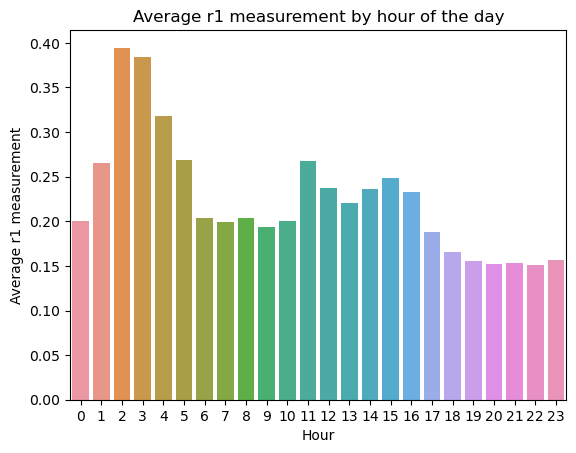

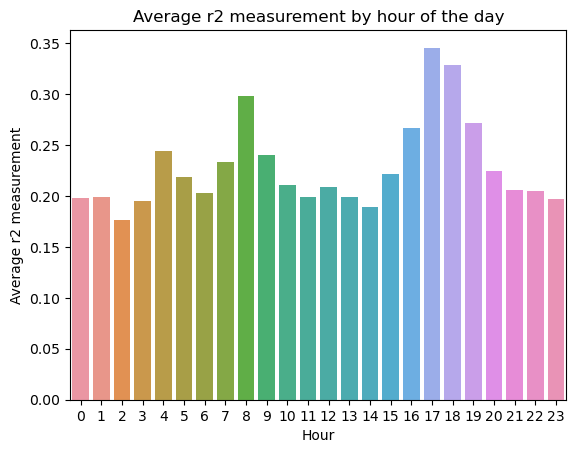

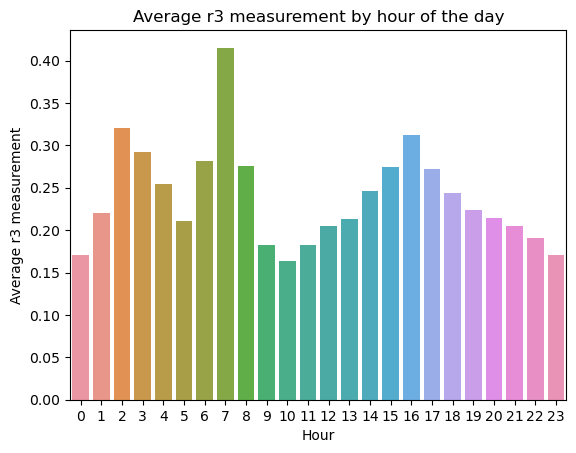

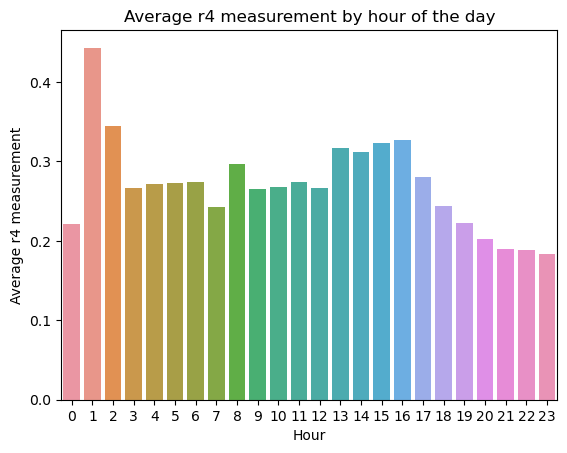

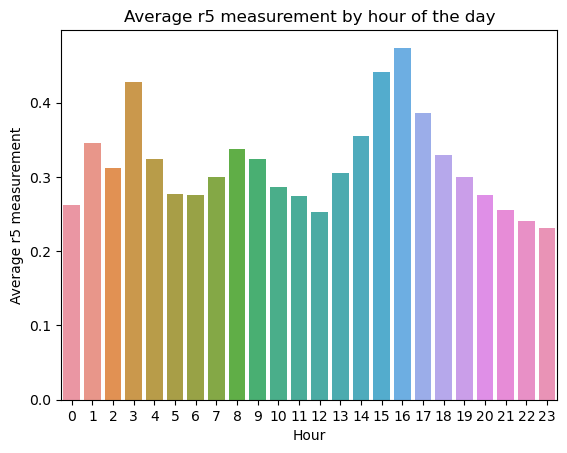

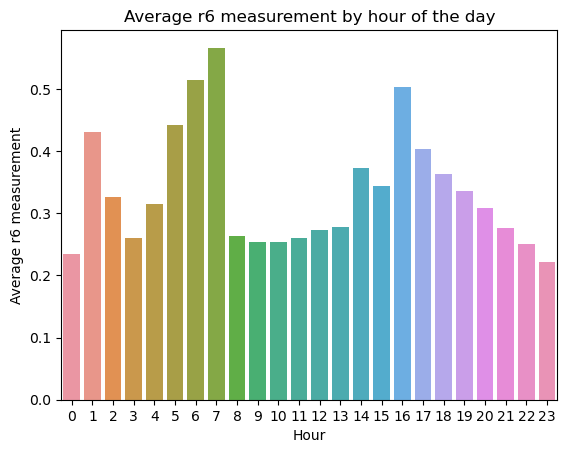

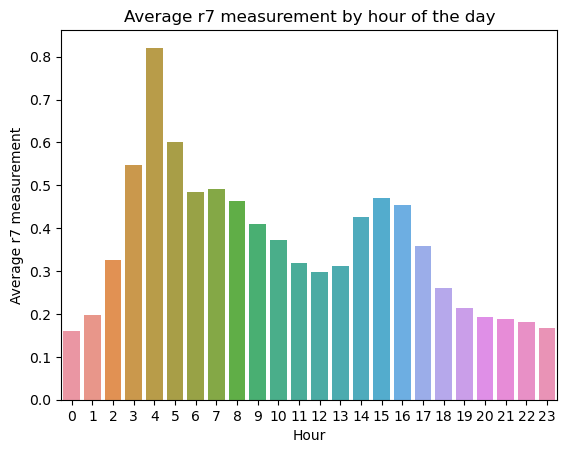

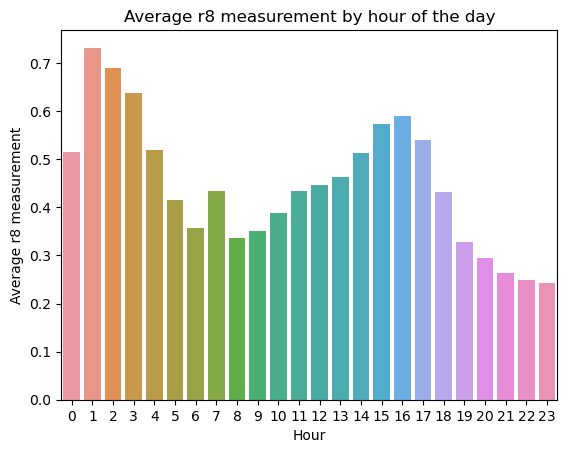

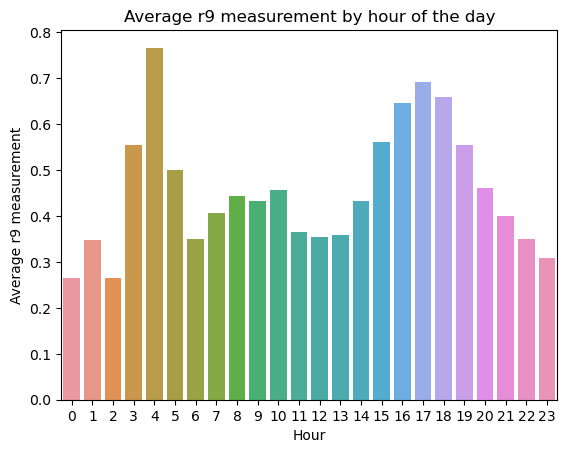

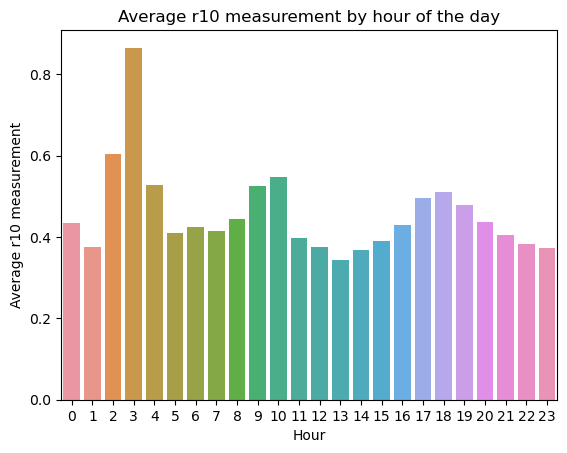

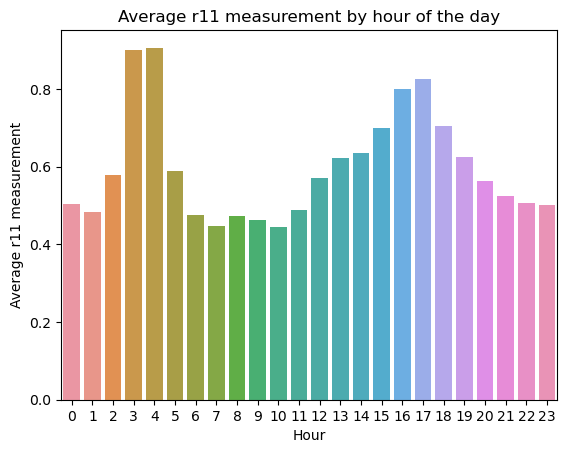

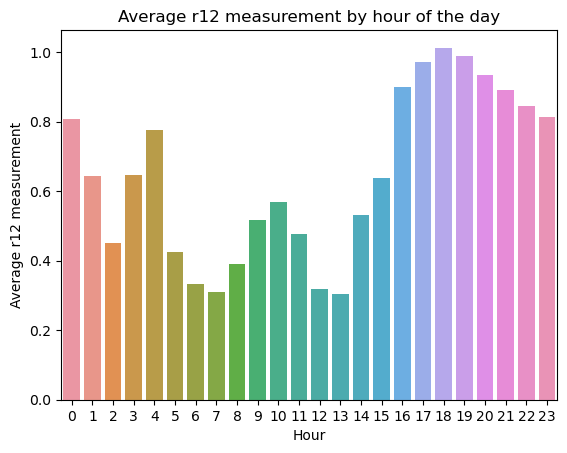

In [9]:



# Loop through each reading column and create a separate plot for each
for i in range(1, 13):
    reading_col = 'r{}'.format(i)
    
    # Create a bar plot
    sns.barplot(data=hourly_data, x='hour', y=reading_col)

    # Label the axes and title
    plt.xlabel('Hour')
    plt.ylabel('Average {} measurement'.format(reading_col))
    plt.title('Average {} measurement by hour of the day'.format(reading_col))
    
    # Show the plot
    plt.show()


# 2) Cluster the meters r1 to r12 and justify the method used

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [11]:
data.drop_duplicates(inplace=True)


In [12]:
# Remove missing or erroneous data points
data.dropna(inplace=True)
# Drop the 'Month' column
data = data.drop('month_name', axis=1)

In [13]:
# Convert categorical data to numerical data
data['season'] = pd.Categorical(data['season'])
data['season'] = data['season'].cat.codes

In [14]:
# Preprocess the data by scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])

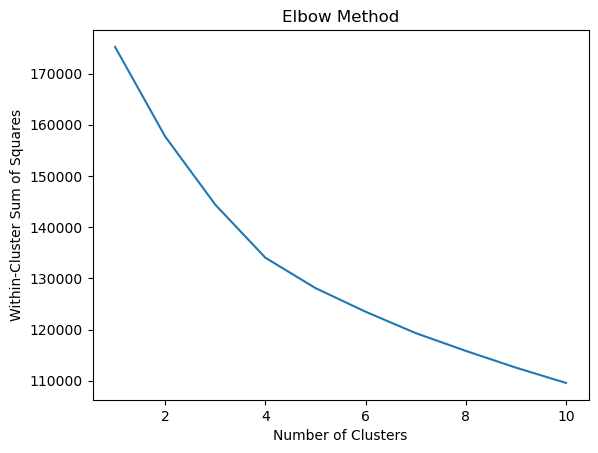

In [15]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


In [16]:
# Based on the elbow plot, choose the number of clusters
n_clusters = 3

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)


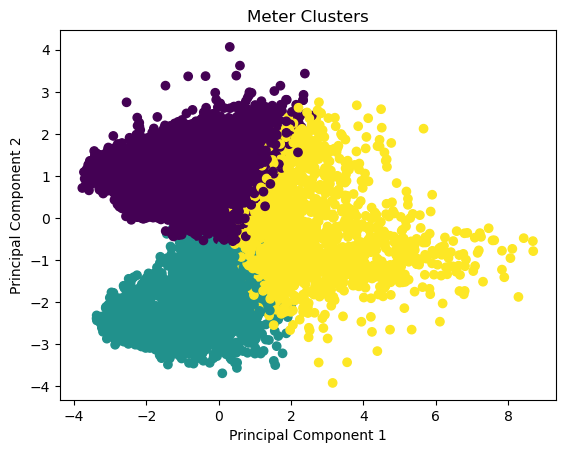

In [17]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Visualize the clusters
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels)
plt.title('Meter Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The method used for clustering is K-means clustering. K-means is a commonly used unsupervised clustering algorithm that partitions the dataset into K clusters, where K is the user-defined number of clusters.

The code uses the elbow method to determine the optimal number of clusters. The elbow method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters, and choosing the number of clusters at the "elbow" of the plot, where the rate of decrease in WCSS starts to level off.

Once the optimal number of clusters is determined, K-means clustering is applied to the data using the chosen number of clusters. The scaled data is first reduced to two dimensions using principal component analysis (PCA), and the resulting principal components are used to visualize the clusters in a scatter plot.

Some other common clustering methods include:
(But not tried)


Hierarchical clustering: This method creates a hierarchical tree-like structure of clusters by either merging smaller clusters into larger ones (agglomerative) or dividing larger clusters into smaller ones (divisive).

DBSCAN: Density-based spatial clustering of applications with noise is a clustering algorithm that groups together data points that are closely packed together while marking outliers as noise.

Gaussian Mixture Models: This algorithm models the distribution of the data as a mixture of Gaussian distributions and clusters the data points accordingly.

Spectral clustering: This method uses graph theory to cluster data by identifying dense subgraphs in a graph representation of the data.

Fuzzy clustering: This method allows data points to belong to multiple clusters with different degrees of membership.

Density-based clustering: This method identifies areas of high density in the data and groups data points that are within these dense regions.
